In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!kaggle datasets download -d animeshkumarnayak/pcb-fault-detection

Dataset URL: https://www.kaggle.com/datasets/animeshkumarnayak/pcb-fault-detection
License(s): CC0-1.0
 99% 161M/163M [00:01<00:00, 119MB/s]
100% 163M/163M [00:01<00:00, 121MB/s]


In [ ]:
!unzip /content/pcb-fault-detection.zip -d /content/drive/MyDrive/pcb-fault-detection

Archive:  /content/pcb-fault-detection.zip
  inflating: /content/drive/MyDrive/pcb-fault-detection/Data/data.yaml  
  inflating: /content/drive/MyDrive/pcb-fault-detection/Data/test/images/VID20210601143927-96_jpg.rf.51037a593015ac38c8ac31613da3c066.jpg  
  inflating: /content/drive/MyDrive/pcb-fault-detection/Data/test/images/VID20210601143927-96_jpg.rf.7ab5347b2d9efca349318d1c0f12a466.jpg  
  inflating: /content/drive/MyDrive/pcb-fault-detection/Data/test/images/VID20210601143927-96_jpg.rf.f5f54e1ed4ec2434ed16cb072a95de94.jpg  
  inflating: /content/drive/MyDrive/pcb-fault-detection/Data/test/images/VID20210601144014-45_jpg.rf.3f10bd61f03a52d57d80d50bffa68cb7.jpg  
  inflating: /content/drive/MyDrive/pcb-fault-detection/Data/test/images/VID20210601144014-45_jpg.rf.4684092b3b896505366fa7aec7c654b7.jpg  
  inflating: /content/drive/MyDrive/pcb-fault-detection/Data/test/images/VID20210601144014-45_jpg.rf.8b106162081310e4defc87c88db64d75.jpg  
  inflating: /content/drive/MyDrive/pcb-faul

In [ ]:
!git clone https://github.com/THU-MIG/yolov10.git


Cloning into 'yolov10'...
remote: Enumerating objects: 20329, done.
remote: Counting objects: 100% (1527/1527), done.
remote: Compressing objects: 100% (176/176), done.
remote: Total 20329 (delta 1450), reused 1359 (delta 1351), pack-reused 18802 (from 1)
Receiving objects: 100% (20329/20329), 11.18 MiB | 26.45 MiB/s, done.
Resolving deltas: 100% (14326/14326), done.


In [ ]:
cd yolov10


/content/yolov10


In [ ]:
!pip install .


Processing /content/yolov10
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for ultralytics: filename=ultralytics-8.1.34-py3-none-any.whl size=731411 sha256=ac528a751f3c0baa3ce5c188d14c8723d209115c974ab5e9babdf4396e30ee5d
  Stored in directory: /tmp/pip-ephem-wheel-cache-z1kjcrkk/wheels/51/93/e8/22d2e815ced343915c15d86b2a00d95eb0a997d012527fbea7
Successfully built ultralytics


In [ ]:
import os
import urllib.request

# Create a directory for the weights in the current working directory
weights_dir = os.path.join(os.getcwd(), "weights")
os.makedirs(weights_dir, exist_ok=True)

# URLs of the weight files
urls = [
    "https://github.com/jameslahm/yolov10/releases/download/v1.0/yolov10n.pt",
    "https://github.com/jameslahm/yolov10/releases/download/v1.0/yolov10s.pt",
    "https://github.com/jameslahm/yolov10/releases/download/v1.0/yolov10m.pt",
    "https://github.com/jameslahm/yolov10/releases/download/v1.0/yolov10b.pt",
    "https://github.com/jameslahm/yolov10/releases/download/v1.0/yolov10x.pt",
    "https://github.com/jameslahm/yolov10/releases/download/v1.0/yolov10l.pt"
]

# Download each file
for url in urls:
    file_name = os.path.join(weights_dir, os.path.basename(url))
    urllib.request.urlretrieve(url, file_name)
    print(f"Downloaded {file_name}")

Downloaded /content/yolov10/weights/yolov10n.pt
Downloaded /content/yolov10/weights/yolov10s.pt
Downloaded /content/yolov10/weights/yolov10m.pt
Downloaded /content/yolov10/weights/yolov10b.pt
Downloaded /content/yolov10/weights/yolov10x.pt
Downloaded /content/yolov10/weights/yolov10l.pt


In [ ]:
!yolo task=detect mode=predict conf=0.25 save=True model=../weights/yolov10n.pt source=/content/drive/MyDrive/car.jpeg


Ultralytics YOLOv8.1.34 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv10n summary (fused): 285 layers, 2762608 parameters, 63840 gradients, 8.6 GFLOPs

image 1/1 /content/drive/MyDrive/car.jpeg: 384x640 1 2, 70.9ms
Speed: 29.1ms preprocess, 70.9ms inference, 392.3ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [ ]:
!yolo task=detect mode=train epochs=10 batch=16 plots=True model=weights/yolov10n.pt data=/content/drive/MyDrive/pcb-fault-detection/custom_data.yaml


In [ ]:
!yolo task=detect mode=predict conf=0.25 save=True model=/content/drive/MyDrive/pcb-fault-detection/train3/weights/best.pt source=/content/drive/MyDrive/pcb-fault-detection/Data/train/images/VID202106071442321-150_jpg.rf.e0d2898be8d924457ededa4ea56bb11c.jpg


Ultralytics YOLOv8.1.34 🚀 Python-3.10.12 torch-2.3.1+cu121 CPU (Intel Xeon 2.20GHz)
YOLOv10n summary (fused): 285 layers, 2697926 parameters, 0 gradients, 8.2 GFLOPs

image 1/1 /content/drive/MyDrive/pcb-fault-detection/Data/train/images/VID202106071442321-150_jpg.rf.e0d2898be8d924457ededa4ea56bb11c.jpg: 640x480 2 Cap1s, 1 Cap2, 1 Cap3, 1 Cap4, 2 MOSFETs, 1 Mov, 1 Resistor, 3 Transformers, 186.9ms
Speed: 15.4ms preprocess, 186.9ms inference, 21.9ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [ ]:
!pip install  ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 581.7 kB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_6

# Custom data Traing

In [ ]:
from ultralytics import YOLO

model = YOLO("yolov10n.pt")
results = model.train(data="/content/drive/MyDrive/pcb-fault-detection/custom_data.yaml",epochs=30)

Ultralytics YOLOv8.2.78 🚀 Python-3.10.12 torch-2.3.0+cpu CPU (Intel Xeon 2.00GHz)
engine/trainer: task=detect, mode=train, model=yolov10n.pt, data=/content/drive/MyDrive/pcb-fault-detection/custom_data.yaml, epochs=30, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train5, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labe

100%|██████████| 755k/755k [00:00<00:00, 15.0MB/s]


Overriding model.yaml nc=80 with nc=9

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1      9856  ultralytics.nn.modules.block.SCDown          [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1     36096  ultralytics

train: Scanning /content/drive/MyDrive/pcb-fault-detection/Data/train/labels... 1099 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1099/1099 [00:58<00:00, 18.63it/s]


train: New cache created: /content/drive/MyDrive/pcb-fault-detection/Data/train/labels.cache


val: Scanning /content/drive/MyDrive/pcb-fault-detection/Data/validation/labels... 200 images, 3 backgrounds, 0 corrupt: 100%|██████████| 200/200 [00:09<00:00, 20.61it/s]


val: New cache created: /content/drive/MyDrive/pcb-fault-detection/Data/validation/labels.cache
Plotting labels to runs/detect/train5/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000769, momentum=0.9) with parameter groups 95 weight(decay=0.0), 108 weight(decay=0.0005), 107 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/train5
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30         0G      2.729      6.732      2.411        179        640: 100%|██████████| 69/69 [02:46<00:00,  2.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:10<00:00,  1.55s/it]

                   all        200       1765     0.0269      0.713      0.388      0.242



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30         0G      2.446      3.199      2.321        161        640: 100%|██████████| 69/69 [02:43<00:00,  2.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:10<00:00,  1.53s/it]

                   all        200       1765      0.711      0.551       0.65      0.465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30         0G      2.319      2.599      2.264        182        640: 100%|██████████| 69/69 [02:43<00:00,  2.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:09<00:00,  1.42s/it]

                   all        200       1765      0.772      0.696      0.753      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30         0G      2.336      2.362      2.257        180        640: 100%|██████████| 69/69 [02:45<00:00,  2.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:10<00:00,  1.57s/it]

                   all        200       1765      0.825      0.748      0.797       0.53



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30         0G      2.249      2.107      2.223        135        640: 100%|██████████| 69/69 [02:46<00:00,  2.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:10<00:00,  1.54s/it]

                   all        200       1765      0.836      0.756      0.807      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30         0G       2.21      1.956      2.212        178        640: 100%|██████████| 69/69 [02:46<00:00,  2.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:10<00:00,  1.52s/it]

                   all        200       1765      0.855      0.755      0.819       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30         0G      2.197      1.879      2.203        184        640: 100%|██████████| 69/69 [02:45<00:00,  2.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:10<00:00,  1.53s/it]

                   all        200       1765      0.872      0.783      0.832      0.615



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30         0G      2.121      1.739      2.182        103        640: 100%|██████████| 69/69 [02:46<00:00,  2.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:10<00:00,  1.49s/it]

                   all        200       1765      0.866      0.801      0.841      0.669



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30         0G      2.039      1.622      2.151        123        640: 100%|██████████| 69/69 [02:46<00:00,  2.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:10<00:00,  1.49s/it]

                   all        200       1765      0.903      0.802      0.844      0.667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30         0G      2.094      1.583      2.177         99        640: 100%|██████████| 69/69 [02:45<00:00,  2.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:10<00:00,  1.55s/it]

                   all        200       1765      0.895      0.801      0.845      0.659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30         0G      1.998      1.472      2.135        171        640: 100%|██████████| 69/69 [02:44<00:00,  2.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:10<00:00,  1.54s/it]

                   all        200       1765      0.885      0.823      0.847      0.673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30         0G      1.966      1.411      2.122        171        640: 100%|██████████| 69/69 [02:46<00:00,  2.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:10<00:00,  1.51s/it]

                   all        200       1765      0.805      0.815      0.854      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30         0G      1.956      1.367      2.114        166        640: 100%|██████████| 69/69 [02:44<00:00,  2.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:11<00:00,  1.59s/it]

                   all        200       1765      0.799      0.826      0.852      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30         0G      1.913      1.311      2.088        178        640: 100%|██████████| 69/69 [02:45<00:00,  2.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:10<00:00,  1.51s/it]

                   all        200       1765      0.807      0.827      0.853      0.674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30         0G      1.927       1.28      2.111        134        640: 100%|██████████| 69/69 [02:45<00:00,  2.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:10<00:00,  1.49s/it]

                   all        200       1765      0.825      0.824      0.857      0.619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30         0G      1.928      1.261      2.109        199        640: 100%|██████████| 69/69 [02:42<00:00,  2.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:10<00:00,  1.47s/it]

                   all        200       1765        0.8      0.841      0.854      0.676



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30         0G      1.913      1.217      2.104        150        640: 100%|██████████| 69/69 [02:40<00:00,  2.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:10<00:00,  1.46s/it]

                   all        200       1765      0.817       0.83      0.856      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30         0G      1.851       1.18      2.081        132        640: 100%|██████████| 69/69 [02:40<00:00,  2.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:10<00:00,  1.46s/it]

                   all        200       1765      0.831      0.824      0.859      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30         0G      1.851      1.156      2.058        205        640: 100%|██████████| 69/69 [02:41<00:00,  2.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:10<00:00,  1.44s/it]

                   all        200       1765       0.82      0.837      0.857      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30         0G      1.788      1.124      2.043        120        640: 100%|██████████| 69/69 [02:39<00:00,  2.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:10<00:00,  1.45s/it]

                   all        200       1765      0.814      0.844      0.857      0.702


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30         0G      1.761       1.12      2.077         95        640: 100%|██████████| 69/69 [02:32<00:00,  2.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:10<00:00,  1.43s/it]

                   all        200       1765      0.815      0.839      0.857      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30         0G      1.685      1.033      2.037         94        640: 100%|██████████| 69/69 [02:33<00:00,  2.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:10<00:00,  1.45s/it]

                   all        200       1765      0.818      0.845      0.859      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30         0G      1.612     0.9867      1.998         92        640: 100%|██████████| 69/69 [02:31<00:00,  2.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:10<00:00,  1.44s/it]

                   all        200       1765      0.823      0.845      0.858      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30         0G      1.591     0.9602       1.98         93        640: 100%|██████████| 69/69 [02:32<00:00,  2.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:10<00:00,  1.45s/it]

                   all        200       1765      0.832      0.831      0.861      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30         0G      1.587     0.9396      1.976         92        640: 100%|██████████| 69/69 [02:31<00:00,  2.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:09<00:00,  1.41s/it]

                   all        200       1765      0.829       0.85      0.861      0.702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30         0G      1.558     0.9228      1.966         91        640: 100%|██████████| 69/69 [02:31<00:00,  2.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:10<00:00,  1.48s/it]

                   all        200       1765      0.834      0.844       0.86      0.684



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30         0G      1.527     0.8917      1.961         92        640: 100%|██████████| 69/69 [02:31<00:00,  2.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:09<00:00,  1.42s/it]

                   all        200       1765      0.836      0.836       0.86      0.721



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30         0G      1.503     0.8789      1.939         92        640: 100%|██████████| 69/69 [02:36<00:00,  2.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:10<00:00,  1.48s/it]

                   all        200       1765      0.838      0.847      0.862      0.712



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30         0G      1.495      0.867       1.94         91        640: 100%|██████████| 69/69 [02:37<00:00,  2.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:10<00:00,  1.51s/it]

                   all        200       1765      0.832      0.853       0.86      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30         0G      1.463     0.8572      1.926         95        640: 100%|██████████| 69/69 [02:36<00:00,  2.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:10<00:00,  1.49s/it]

                   all        200       1765       0.83       0.85      0.861      0.694



30 epochs completed in 1.441 hours.
Optimizer stripped from runs/detect/train5/weights/last.pt, 5.7MB
Optimizer stripped from runs/detect/train5/weights/best.pt, 5.7MB

Validating runs/detect/train5/weights/best.pt...
Ultralytics YOLOv8.2.78 🚀 Python-3.10.12 torch-2.3.0+cpu CPU (Intel Xeon 2.00GHz)
YOLOv10n summary (fused): 285 layers, 2,697,926 parameters, 0 gradients, 8.2 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:09<00:00,  1.39s/it]


                   all        200       1765      0.836      0.835       0.86      0.721
                  Cap1        197        197      0.968       0.99      0.991      0.877
                  Cap2        197        197      0.935      0.939      0.982      0.787
                  Cap3        196        196      0.946      0.986      0.986      0.867
                  Cap4        196        202      0.921      0.787      0.927      0.735
                MOSFET        197        197      0.953      0.927      0.974      0.854
                   Mov        197        197       0.96      0.986      0.984      0.852
              Resestor          3          3          0          0          0          0
              Resistor        188        191      0.898      0.937      0.935      0.687
           Transformer        197        385      0.946      0.964      0.962       0.83
Speed: 0.4ms preprocess, 27.4ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/detec

# interphase


image 1/1 /content/drive/MyDrive/pcb-fault-detection/Data/train/images/VID20210601143927-96_jpg.rf.be5e4aeaa0b8114ebc3dbb96b69a78b9.jpg: 640x384 1 Cap1, 1 Cap2, 1 Cap3, 1 Cap4, 2 MOSFETs, 2 Movs, 1 Resistor, 2 Transformers, 89.6ms
Speed: 3.2ms preprocess, 89.6ms inference, 0.3ms postprocess per image at shape (1, 3, 640, 384)


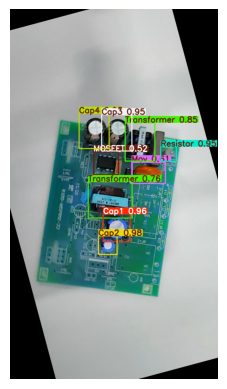

In [ ]:
from ultralytics import YOLO
import matplotlib.pyplot as plt

# Load a pre-trained YOLOv10n model
model = YOLO("/content/drive/MyDrive/runs/detect/train5/weights/best.pt")

# Perform object detection on an image
results = model("/content/drive/MyDrive/pcb-fault-detection/Data/train/images/VID20210601143927-96_jpg.rf.be5e4aeaa0b8114ebc3dbb96b69a78b9.jpg")

# Display the image using matplotlib
plt.imshow(results[0].plot())  # plot() method overlays the detection results on the image
plt.axis('off')  # Optionally turn off axis labels
plt.show()


In [ ]:
!unzip Data.zip -d /content/

Archive:  Data.zip
   creating: /content/Data/
   creating: /content/Data/train/
  inflating: /content/Data/train/component_0_5.0.jpg  
  inflating: /content/Data/train/component_0_0.0.jpg  
  inflating: /content/Data/train/component_2_5.0.jpg  
  inflating: /content/Data/train/component_1_3.0.jpg  
  inflating: /content/Data/train/component_2_1.0.jpg  
  inflating: /content/Data/train/component_3_4.0.jpg  
  inflating: /content/Data/train/component_5_8.0.jpg  
  inflating: /content/Data/train/component_6_7.0.jpg  
  inflating: /content/Data/train/component_7_5.0.jpg  
  inflating: /content/Data/train/component_8_8.0.jpg  
  inflating: /content/Data/train/component_1_1.0.jpg  
  inflating: /content/Data/train/component_2_7.0.jpg  
  inflating: /content/Data/train/component_3_0.0.jpg  
  inflating: /content/Data/train/component_7_4.0.jpg  
  inflating: /content/Data/train/component_3_3.0.jpg  
  inflating: /content/Data/train/component_4_0.0.jpg  
  inflating: /content/Data/train/compon

In [ ]:
from ultralytics import YOLO

model = YOLO("yolov10n.pt")
results = model.train(data="/content/data.yaml",epochs=3)

Ultralytics YOLOv8.2.78 🚀 Python-3.10.12 torch-2.3.1+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov10n.pt, data=/content/data.yaml, epochs=3, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True

100%|██████████| 755k/755k [00:00<00:00, 103MB/s]


Overriding model.yaml nc=80 with nc=4

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1      9856  ultralytics.nn.modules.block.SCDown          [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1     36096  ultralytics

train: Scanning /content/Data/image... 0 images, 83 backgrounds, 0 corrupt: 100%|██████████| 83/83 [00:00<00:00, 2829.13it/s]

train: WARNING ⚠️ No labels found in /content/Data/image.cache. See https://docs.ultralytics.com/datasets for dataset formatting guidance.
train: New cache created: /content/Data/image.cache
WARNING ⚠️ No labels found in /content/Data/image.cache, training may not work correctly. See https://docs.ultralytics.com/datasets for dataset formatting guidance.


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/Data/image.cache... 0 images, 83 backgrounds, 0 corrupt: 100%|██████████| 83/83 [00:00<?, ?it/s]

WARNING ⚠️ No labels found in /content/Data/image.cache, training may not work correctly. See https://docs.ultralytics.com/datasets for dataset formatting guidance.


Plotting labels to runs/detect/train2/labels.jpg... 
zero-size array to reduction operation maximum which has no identity
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 95 weight(decay=0.0), 108 weight(decay=0.0005), 107 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/train2
Starting training for 3 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/3         0G          0      214.8          0          0        640: 100%|██████████| 6/6 [01:21<00:00, 13.51s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:25<00:00,  8.63s/it]

                   all         83          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/3         0G          0        211          0          0        640: 100%|██████████| 6/6 [01:15<00:00, 12.63s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:24<00:00,  8.09s/it]

                   all         83          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/3         0G          0      207.2          0          0        640: 100%|██████████| 6/6 [01:13<00:00, 12.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:23<00:00,  7.95s/it]

                   all         83          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



3 epochs completed in 0.098 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 5.7MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 5.7MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics YOLOv8.2.78 🚀 Python-3.10.12 torch-2.3.1+cu121 CPU (Intel Xeon 2.20GHz)
YOLOv10n summary (fused): 285 layers, 2,695,976 parameters, 0 gradients, 8.2 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:30<00:00, 10.07s/it]

                   all         83          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels


Speed: 3.0ms preprocess, 351.5ms inference, 0.0ms loss, 0.1ms postprocess per image
Results saved to runs/detect/train2


In [ ]:
from ultralytics import YOLO
import matplotlib.pyplot as plt

# Load a pre-trained YOLOv10n model
model = YOLO("/content/yolov10n.pt")

# Perform object detection on an image
results = model("/content/component_9_7.0.jpg")

# Display the image using matplotlib
plt.imshow(results[0].plot())  # plot() method overlays the detection results on the image
plt.axis('off')  # Optionally turn off axis labels
plt.show()

In [ ]:
results = model("/content/VID202106071435211-0_jpg.rf.2fe247cd3915533ee979e46e91051d9b.jpg")

# Display the image using matplotlib
plt.imshow(results[0].plot())  # plot() method overlays the detection results on the image
plt.axis('off')  # Optionally turn off axis labels
plt.show()


image 1/1 /content/VID202106071435211-0_jpg.rf.2fe247cd3915533ee979e46e91051d9b.jpg: 640x384 (no detections), 154.0ms
Speed: 3.1ms preprocess, 154.0ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 384)


In [ ]:
# Display the image using matplotlib
plt.imshow(results[0].plot())  # plot() method overlays the detection results on the image
plt.axis('off')  # Optionally turn off axis labels
plt.show()